# **Breast Cancer Prediction**

## **Supervised Learning** 

![dataset-cover.jpg](../imgs/dataset-cover.jpg)

---

### **Introduction**

#### About Dataset

The dataset used in this project was obtained from the [Kaggle's Cancer Data Page](https://www.kaggle.com/datasets/adhamelkomy/breast-cancer). It contains 569 instances of cancer biopsies, each with 32 attributes. One of the attributes is the diagnosis, which can be either benign or malignant. The other 30 attributes are numeric-valued laboratory measurements, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension. The remaining attribute represents the ID number of the instance.

#### About the Problem

The goal of this project is to predict whether a cancer biopsy is benign or malignant, based on the 30 attributes mentioned above. This is a <u>binary classification problem</u>, where the target variable is the diagnosis, which can be either <b>benign</b> or <b>malignant</b>.

#### About the Solution

The solution to this problem is a supervised learning model, which will be trained using the dataset mentioned above. The model will be trained using the training set, and then evaluated using the test set. The model will be evaluated using the accuracy metric, which is the percentage of correct predictions made by the model.

#### This project was developed by group A2_50
| Name                 | Number    | E-Mail            |
| -------------------- | --------- | ----------------- |
| Eduardo Oliveira     | 202108690 | up202108690@up.pt |
| João Francisco Alves | 202006281 | up202006281@up.pt |
| José Miguel Isidro   | 202006485 | up202006485@up.pt |


---

### **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is a crucial initial step in any data analysis project, allowing us to gain insights into the characteristics and structure of the dataset. In this phase, we will delve into the breast cancer dataset, examining its features, distributions, relationships, and potential patterns. Through visualizations and statistical summaries, we aim to uncover valuable information that will guide subsequent steps in the project.

#### Importing Libraries

We firstly need to install and import the libraries we use in this project.

To do so, run the following command in the terminal, from the root of the repository:

```bash
pip install -r requirements.txt
```

Then, we can import the libraries.

We also disable the warnings, to make the notebook cleaner.

In [68]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
from imblearn.under_sampling import AllKNN
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
#from pycaret.classification import *


warnings.filterwarnings('ignore')

#### Load the dataset

In [69]:
df = pd.read_csv('../data/data.csv')

pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Statistical Summary: Understanding the Dataset

In [70]:
# Basic information about the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [71]:
# Print the number of lines and columns in the dataset
df.shape

(569, 32)

In the following code, we create a heatmap visualization of the correlation matrix of the dataset. Heatmaps are valuable tools for visualizing the correlation between different variables in a dataset. The colors represent the strength and direction of the correlation: warmer colors (reds) indicate positive correlation, while cooler colors (blues) indicate negative correlation.

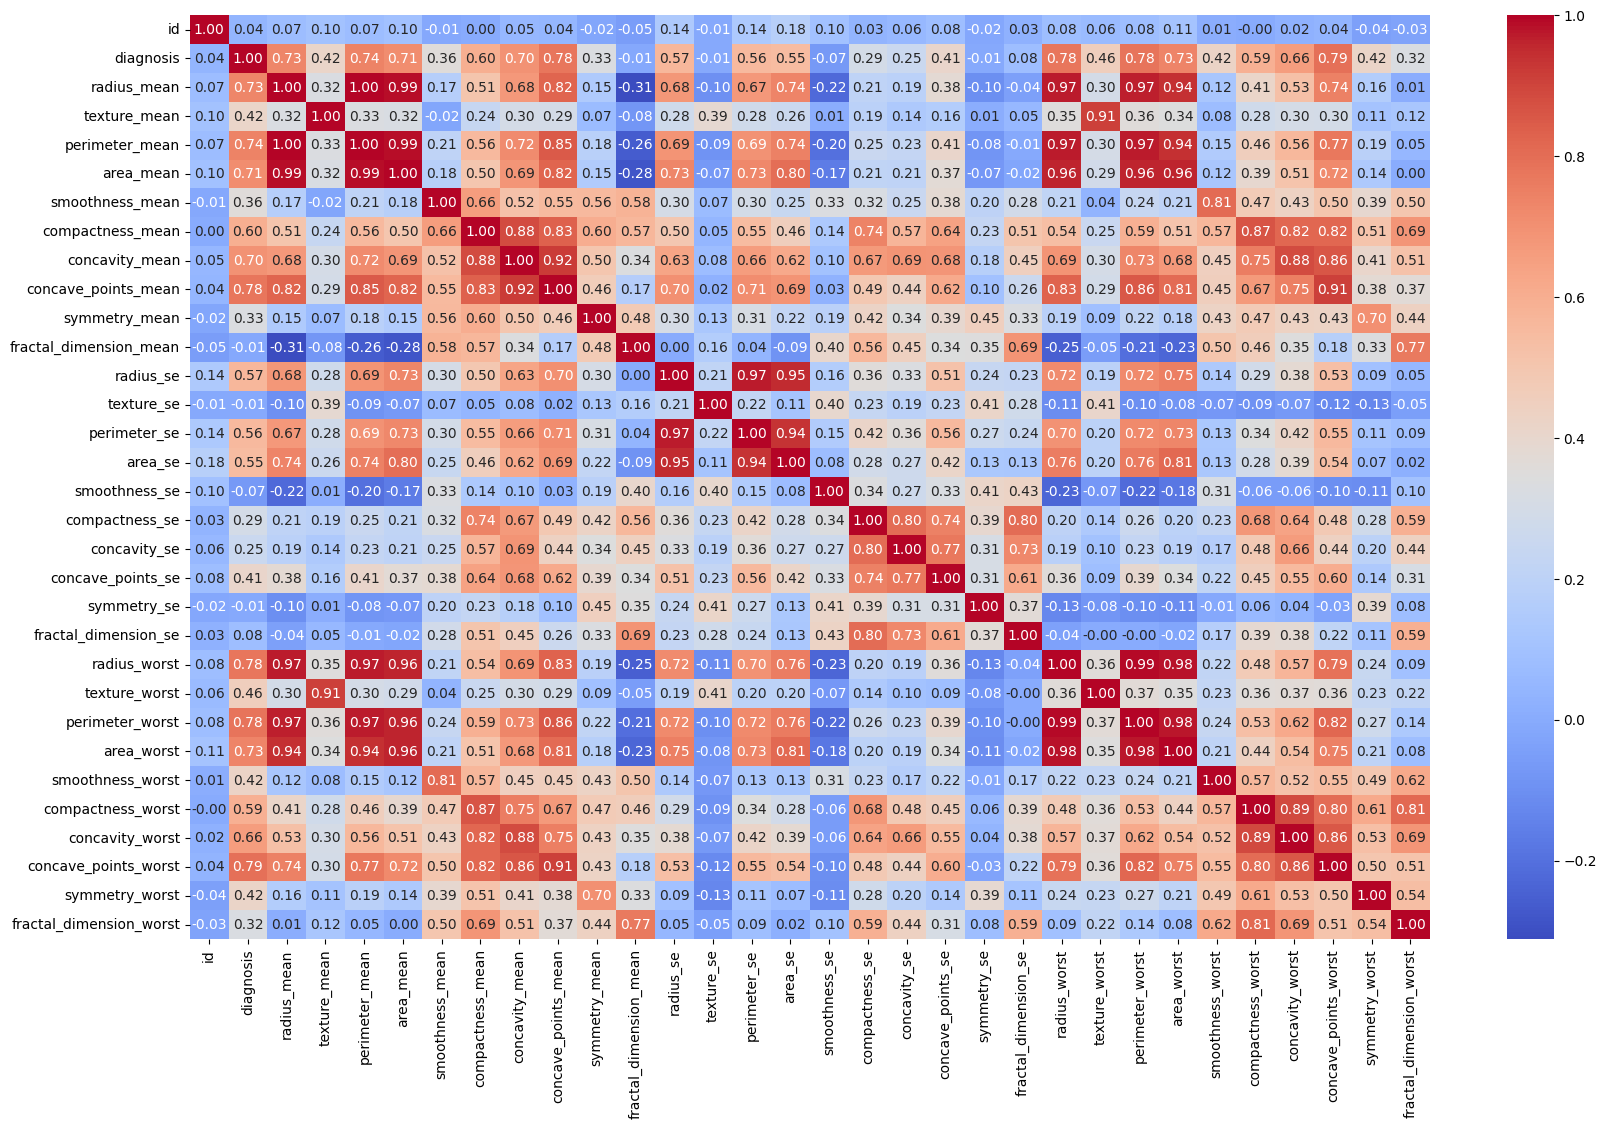

In [72]:
# Cria uma cópia do DataFrame
df_copy = df.copy()

# Converte a coluna categórica para numérica
df_copy['diagnosis'] = df_copy['diagnosis'].map({'M': 1, 'B': 0})

# Heatmap da matriz de correlação
plt.figure(figsize=(20,12))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

> **Conclusion**: After analyzing the heatmap, we observed that the factors most strongly correlated with the diagnosis of cancer type are: radius, perimeter, area, concavity, concave_points. 

Number of B Diagnoses: 357
Number of M Diagnoses: 212


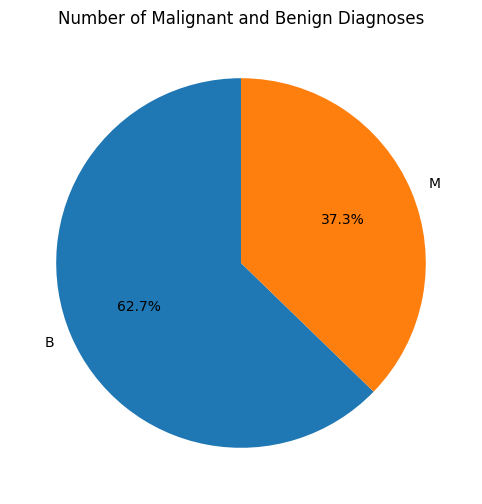

In [73]:
# Create a copy of the 'diagnosis' column and convert it to string
diagnosis_copy = df['diagnosis'].astype(str).copy()

# Replace '1' with 'Malign' and '0' with 'Benign' in the copy
diagnosis_copy = diagnosis_copy.replace({'1': 'Malign', '0': 'Benign'})

# Count the number of malignant and benign diagnoses
diagnosis_counts = diagnosis_copy.value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Malignant and Benign Diagnoses')

# Display the total counts of malignant and benign diagnoses
for diagnosis, count in diagnosis_counts.items():
    print(f"Number of {diagnosis} Diagnoses: {count}")

plt.show()

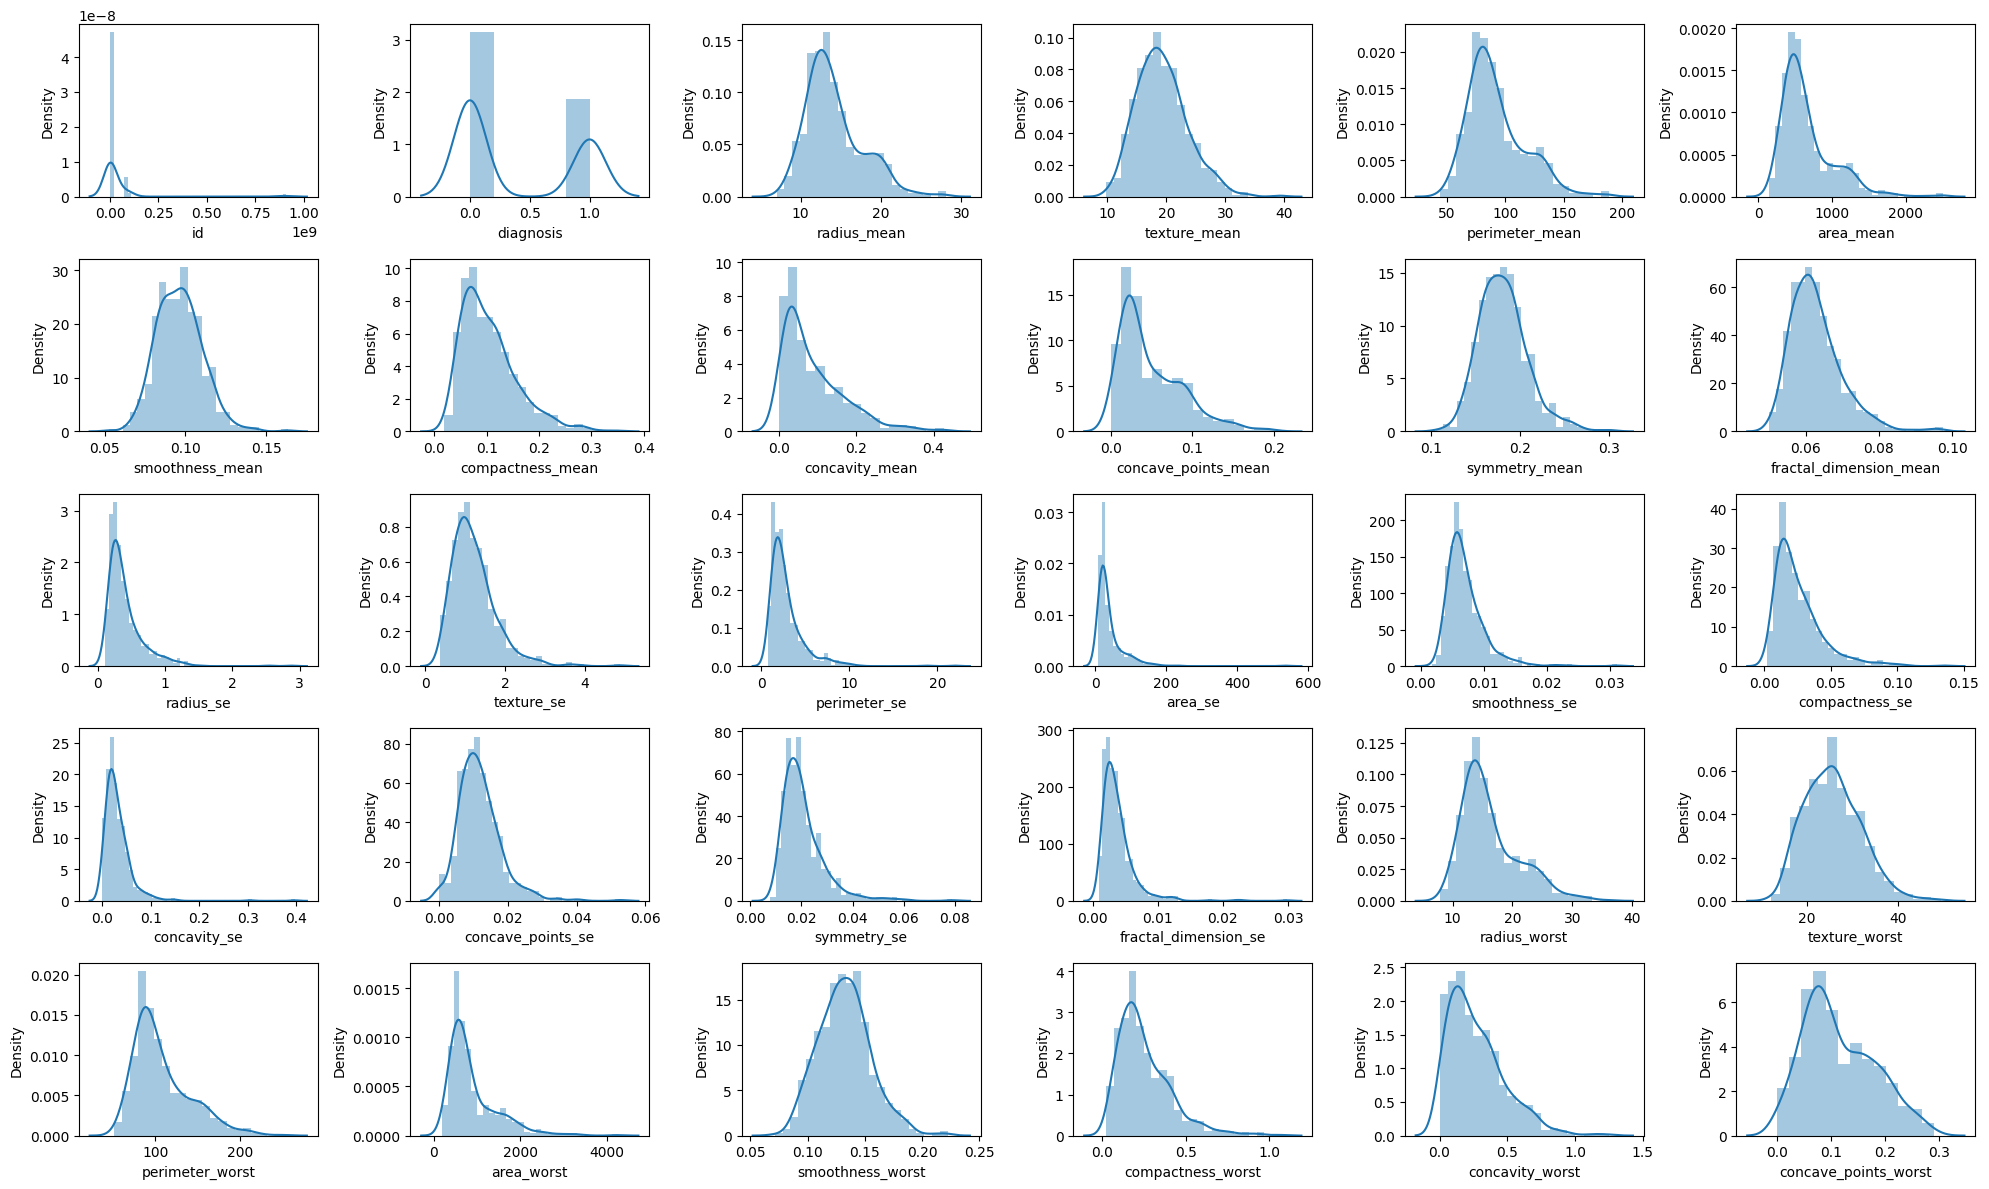

In [74]:
# Cria uma cópia do DataFrame
df_copy = df.copy()

# Converte a coluna categórica para numérica
df_copy['diagnosis'] = df_copy['diagnosis'].map({'M': 1, 'B': 0})

# Gráfico de densidade
plt.figure(figsize=(20,12))
plotnumber = 1
for column in df_copy:
    if plotnumber <= 30:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df_copy[column], ax=ax)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

---

### **Data Pre-processing**

#### Filtering out outliers

After verification, we have been determined that the 'id' column doesn't contribute to analysis. Streamlining dataset for improved efficiency.

In [75]:
df.drop(columns=['id'], inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We also need to verify the presence of duplicates.

In [76]:
# check for duplicates
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


#### Handling Missing Values and Label Encoding
Missing values can often hinder the performance of machine learning models. Therefore, it's crucial to start by inspecting the dataset for any missing values.
Before proceeding with any data manipulation or analysis, it's also important to understand the data types of each column in the dataset. This helps ensure that the data is in the appropriate format for subsequent processing steps.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

> **Conclusion:**
Fortunately, the output shows that there are no missing values in any column of the dataset. This suggests that we can proceed with the analysis without the need for imputation or other missing data handling techniques.
However, the output reveals the data types of each column, confirming that the `diagnosis` column is indeed represented as an object type, indicating categorical data. This aligns with our expectation, as the diagnosis column contains categorical values ('M' for malignant and 'B' for benign). It's necessary to perform label encoding, with 'M' encoded as 1 and 'B' encoded as 0. This conversion ensures compatibility with machine learning algorithms that require numerical input.

In [78]:
label_encoder = LabelEncoder()

# Fit LabelEncoder to the 'diagnosis' column containing 'M' and 'B'
label_encoder.fit(df['diagnosis'])

# Transform the 'diagnosis' column using LabelEncoder
df['diagnosis'] = label_encoder.transform(df['diagnosis'])

df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


#### Spliting the data into training and test sets

In machine learning projects, it's essential to split the dataset into separate training and test sets to assess the performance of the model on unseen data. Since our dataset is not very large, we need to carefully consider the splitting strategy to ensure reliable model evaluation.

For our breast cancer classification project, where having a balanced representation of both malignant and benign cases is crucial, we'll use a technique called stratified sampling. This technique ensures that the proportions of classes in the original dataset are preserved in both the training and test sets.

In [79]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (455, 30) (455,)
Test set shape: (114, 30) (114,)


> **Conclusion**: Using stratified sampling, we've split our dataset into balanced training and test sets. With 455 samples in the training set and 114 in the test set, our model will be trained and evaluated on representative data, ensuring reliable performance assessment.

In [80]:
# Step 1: Calculate class distribution in the original dataset
original_class_distribution = df['diagnosis'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_class_distribution)

# Step 2: Calculate class distribution in the training and test sets
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

print("\nTraining Set Class Distribution:")
print(train_class_distribution)
print("\nTest Set Class Distribution:")
print(test_class_distribution)

# Step 3: Compare class distributions
class_distribution_similarity = (train_class_distribution - test_class_distribution).abs().sum()
print("\nClass Distribution Similarity Score:", class_distribution_similarity)

Original Class Distribution:
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

Training Set Class Distribution:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Test Set Class Distribution:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

Class Distribution Similarity Score: 0.010410641989589353


> **Conclusion**: Based on this information, we can conclude that the split was well done, as it maintains a similar proportion of classes (malignant and benign) between the training and test sets, closely reflecting the distribution in the original dataset.

---

### **Model Selection and Implementation**

#### **Decision Tree Algorithm**

In [81]:
# Model Training
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

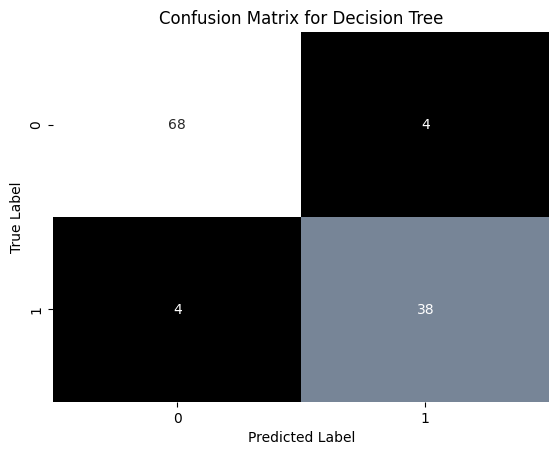

Confusion Matrix for Decision Tree:
____________________________________________________________________________________________________
num of True Positive : 38
num of True Negative : 68
num of False Positive : 4
num of False Negative : 4


In [82]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Decision Tree:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])


In [83]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Decision Tree:')
print(classification_rep)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [84]:
# Calculate the accuracy of the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy_decision_tree*100:.2f}%')

Accuracy of Decision Tree: 92.98%


#### **K-NN Algorithm**

In [85]:
# Model Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

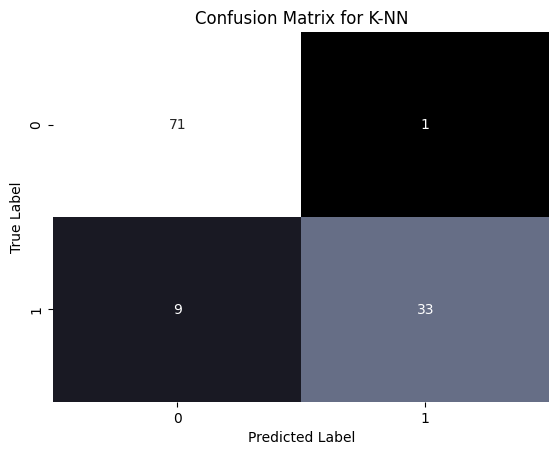

Confusion Matrix for K-NN:
____________________________________________________________________________________________________
num of True Positive : 33
num of True Negative : 71
num of False Positive : 1
num of False Negative : 9


In [86]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for K-NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for K-NN:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])


In [87]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for K-NN:')
print(classification_rep)



Classification Report for K-NN:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



In [88]:
# Calculate the accuracy of the K-NN model
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy of K-NN: {accuracy_knn*100:.2f}%')


Accuracy of K-NN: 91.23%


#### **SVM Algorithm**

In [89]:
# Model Training
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

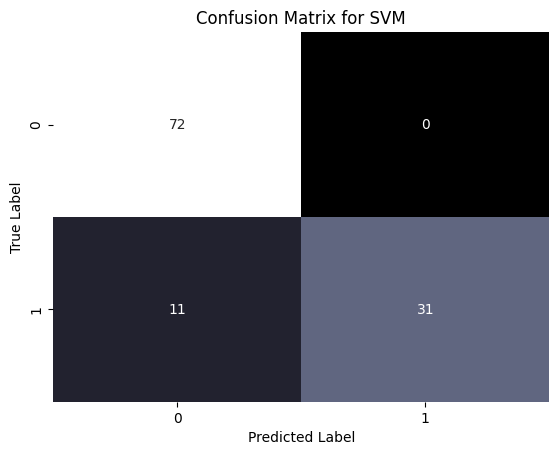

Confusion Matrix for SVM:
____________________________________________________________________________________________________
num of True Positive : 31
num of True Negative : 72
num of False Positive : 0
num of False Negative : 11


In [90]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for SVM:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])


In [91]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for SVM:')
print(classification_rep)



Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [92]:
# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy_svm*100:.2f}%')


Accuracy of SVM: 90.35%


#### **Neural Networks algorithm**

In [93]:
# Model Training
neural_network = MLPClassifier(random_state=42)
neural_network.fit(X_train, y_train)

# Make predictions on the test set
y_pred = neural_network.predict(X_test)

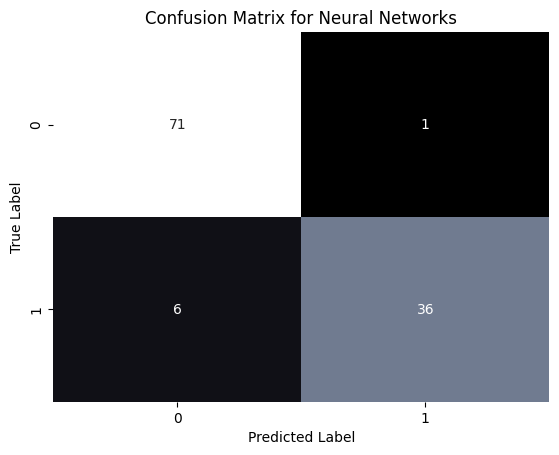

Confusion Matrix for Neural Networks:
____________________________________________________________________________________________________
num of True Positive : 36
num of True Negative : 71
num of False Positive : 1
num of False Negative : 6


In [94]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Neural Networks')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Neural Networks:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])


In [95]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Neural Networks:')
print(classification_rep)



Classification Report for Neural Networks:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [96]:
# Calculate the accuracy of the Neural Networks model
accuracy_nn = accuracy_score(y_test, y_pred)
print(f'Accuracy of Neural Networks: {accuracy_nn*100:.2f}%')


Accuracy of Neural Networks: 93.86%


#### **Logistic Regression algorithm**

In [97]:
# Model Training
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

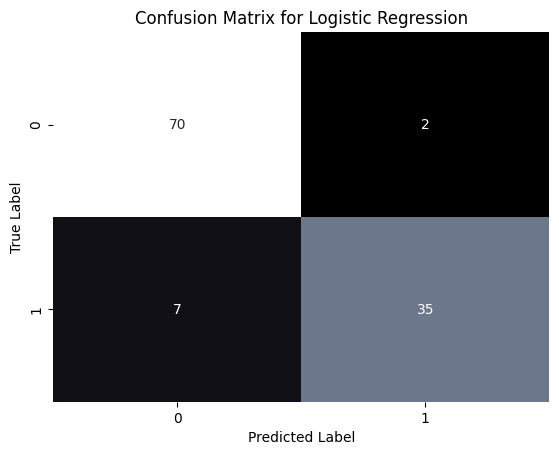

Confusion Matrix for Logistic Regression:
____________________________________________________________________________________________________
num of True Positive : 35
num of True Negative : 70
num of False Positive : 2
num of False Negative : 7


In [102]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Logistic Regression:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

In [103]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Logistic Regression:')
print(classification_rep)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [105]:
# Calculate the accuracy of the Neural Networks model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_lr*100:.2f}%')

Accuracy of Logistic Regression: 92.11%


#### **Naive Bayes algorithm**

In [108]:
# Model Training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

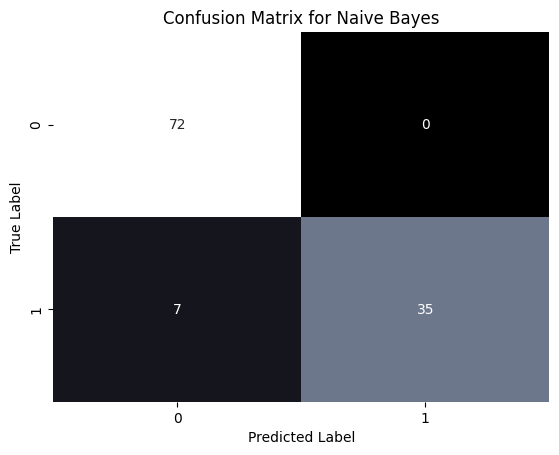

Confusion Matrix for Naive Bayes:
____________________________________________________________________________________________________
num of True Positive : 35
num of True Negative : 72
num of False Positive : 0
num of False Negative : 7


In [109]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Naive Bayes:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

In [110]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Naive Bayes:')
print(classification_rep)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [111]:
# Calculate the accuracy of the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes: {accuracy_nb*100:.2f}%')

Accuracy of Naive Bayes: 93.86%


#### **Random Forest algorithm**

In [113]:
# Model Training
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

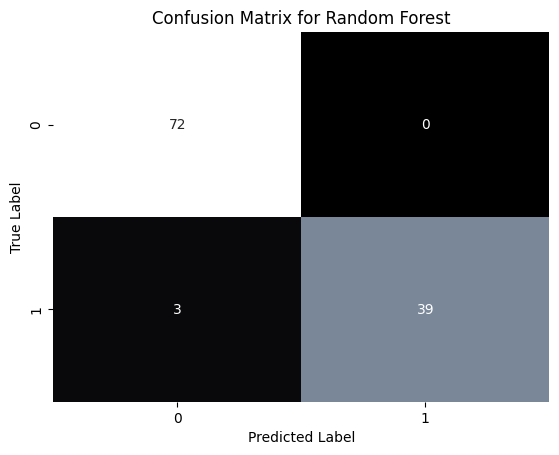

Confusion Matrix for Random Forest:
____________________________________________________________________________________________________
num of True Positive : 39
num of True Negative : 72
num of False Positive : 0
num of False Negative : 3


In [114]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Random Forest:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

In [115]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Random Forest:')
print(classification_rep)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [116]:
# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy_rf*100:.2f}%')

Accuracy of Random Forest: 97.37%


#### **Gradient Boosting algorithm**

In [118]:
# Model Training
gradient_boost = GradientBoostingClassifier(random_state=42)
gradient_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boost.predict(X_test)

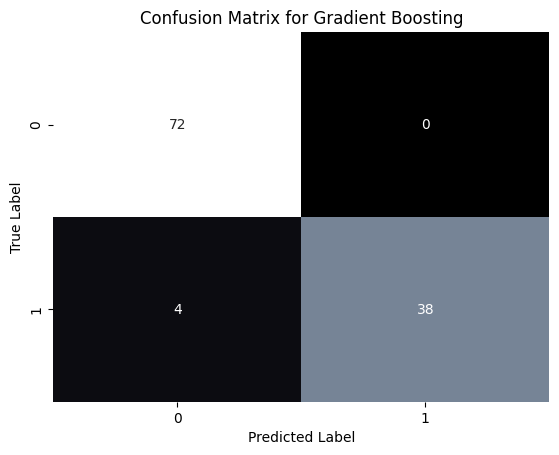

Confusion Matrix for Gradient Boosting:
____________________________________________________________________________________________________
num of True Positive : 38
num of True Negative : 72
num of False Positive : 0
num of False Negative : 4


In [119]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for Gradient Boosting:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

In [120]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Gradient Boosting:')
print(classification_rep)


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [121]:
# Calculate the accuracy of the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gradient Boosting: {accuracy_gb*100:.2f}%')

Accuracy of Gradient Boosting: 96.49%


#### **Ada Boosting algorithm**

In [123]:
# Model Training
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

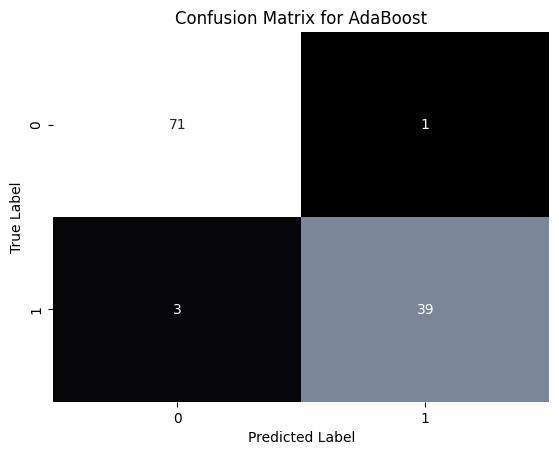

Confusion Matrix for AdaBoost:
____________________________________________________________________________________________________
num of True Positive : 39
num of True Negative : 71
num of False Positive : 1
num of False Negative : 3


In [124]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for AdaBoost:')
print("__"*50 )
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

In [125]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for AdaBoost:')
print(classification_rep)


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



---

In [126]:
# Calculate the accuracy of the AdaBoost model
accuracy_ab = accuracy_score(y_test, y_pred)
print(f'Accuracy of AdaBoost: {accuracy_ab*100:.2f}%')

Accuracy of AdaBoost: 96.49%


### **Results Visualization**

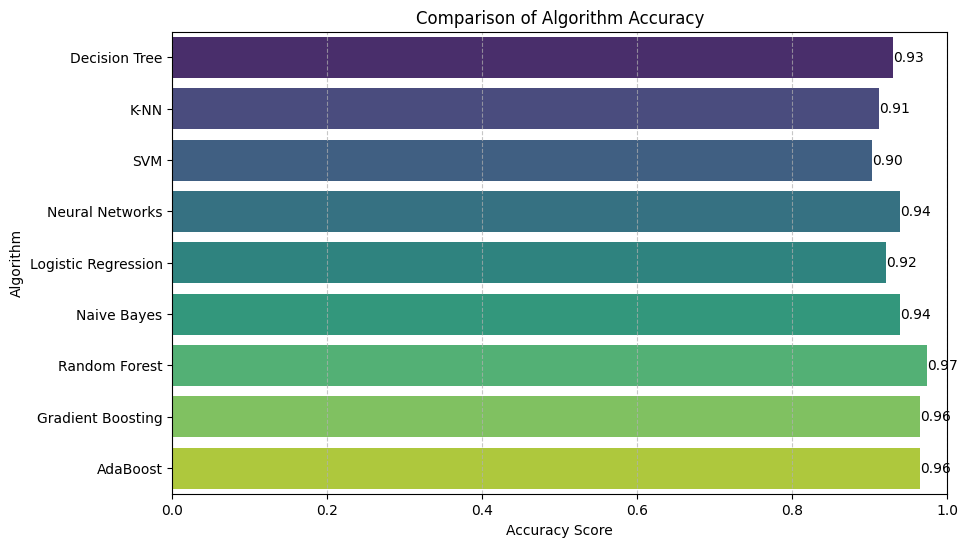

In [127]:
accuracy_scores = {
    'Decision Tree': accuracy_decision_tree,
    'K-NN': accuracy_knn,
    'SVM': accuracy_svm,
    'Neural Networks': accuracy_nn,
    'Logistic Regression': accuracy_lr,
    'Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'AdaBoosting': accuracy_ab,
    # Add more algorithms and their accuracy scores here
}

algorithm_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_values, y=algorithm_names, palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithm')
plt.title('Comparison of Algorithm Accuracy')

for i, (algorithm, accuracy) in enumerate(accuracy_scores.items()):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center')

plt.xlim(0, 1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

---

### **Conclusion**